Model Eğitiliyor: Random Forest...

--- Random Forest Sonuçları ---
Accuracy: 0.8068
              precision    recall  f1-score   support

           0       0.92      0.82      0.87     22717
           1       0.54      0.76      0.63      6375

    accuracy                           0.81     29092
   macro avg       0.73      0.79      0.75     29092
weighted avg       0.84      0.81      0.82     29092



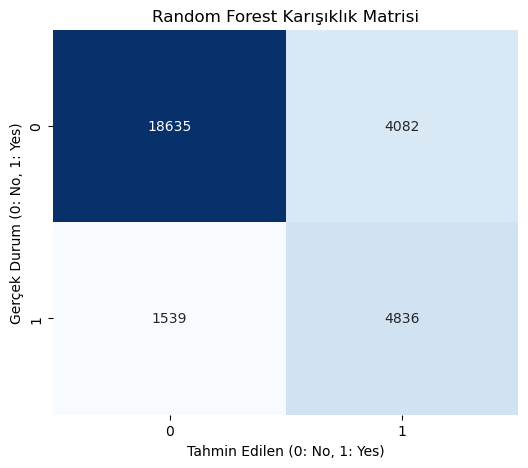

In [1]:
# --- FET445_22040101049_TeamShinningStars_2.ipynb ---
# Algoritma: Random Forest

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Veri Yükle
df = pd.read_csv('cleaned_weather_vize.csv')
if 'RISK_MM' in df.columns: df.drop('RISK_MM', axis=1, inplace=True)

# 2. Veri Ayırma
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Model Eğitimi
print("Model Eğitiliyor: Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 4. Tahmin
y_pred = rf_model.predict(X_test)

print("\n--- Random Forest Sonuçları ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# --- GÖRSEL 1: CONFUSION MATRIX---
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)

# Isı haritası çizimi
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen (0: No, 1: Yes)')
plt.ylabel('Gerçek Durum (0: No, 1: Yes)')
plt.show()